# Financial Fraud Detection EDA
 ---
 Elegí este dataset ya que trabajo en una fintech en donde hay una potencial mejora en el área de Fraud Detection/Risk. <br>
 El objetivo principal es llegar a entrenar un modelo que pueda detectar y clasificar fraude o anomalías en las transacciones que pasan por la plataforma.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Acquisition
Levantamos los datos <br>
Si bien localmente tengo los datos descargardo, no los subo a github por tema de espacio, pero dejo el link del dataset público.
<br>
[Fraud Dataset link](https://www.kaggle.com/datasets/goyaladi/fraud-detection-dataset)

In [3]:
!ls ./work/data

'Customer Profiles'    'Merchant Information'  'Transaction Data'
'Fraudulent Patterns'  'Transaction Amounts'


In [4]:
#customer data
df_customer = pd.read_csv("./work/data/Customer Profiles/customer_data.csv")
df_account_activity = pd.read_csv("./work/data/Customer Profiles/account_activity.csv")

#fraudulent patterns
df_fraud = pd.read_csv("./work/data/Fraudulent Patterns/fraud_indicators.csv")
df_susp_activity = pd.read_csv("./work/data/Fraudulent Patterns/suspicious_activity.csv")

#merchant data
df_merchants = pd.read_csv("./work/data/Merchant Information/merchant_data.csv")
df_trx_cat_labels = pd.read_csv("./work/data/Merchant Information/transaction_category_labels.csv")

#transaction amounts
df_amounts = pd.read_csv("./work/data/Transaction Amounts/amount_data.csv")
df_anomaly_scores = pd.read_csv("./work/data/Transaction Amounts/anomaly_scores.csv")

#transaction data
df_trx_metadata = pd.read_csv("./work/data/Transaction Data/transaction_metadata.csv")
df_trx_records= pd.read_csv("./work/data/Transaction Data/transaction_records.csv")

### Exploración de datos: Primera vista

In [5]:
def first_look_eda(df, name):
    print(f"Dataframe name: {name}")
    print("First 5 rows of the dataset")
    print(df.head())
    print("Data types of the columns")
    print(df.dtypes)
    print("Number of rows and columns")
    print(df.shape)
    print("Columns names")
    print(df.columns)
    print("Number of missing values")
    print(df.isnull().sum())
    print("Summary statistics")
    print(df.describe())
    print("Unique values")
    print(df.nunique())
    print("===============================================")

In [6]:
# dict with dataframe name and dataframe object
dataframes_dict = {"Customer Data": df_customer, "Account Activity": df_account_activity, "Fraud Indicators": df_fraud, "Suspicious Activity": df_susp_activity, "Merchant Data": df_merchants, "Transaction Category Labels": df_trx_cat_labels, "Amount Data": df_amounts, "Anomaly Scores": df_anomaly_scores, "Transaction Metadata": df_trx_metadata, "Transaction Records": df_trx_records} 


In [7]:
# uso la funcion first look para cada df
for name, df in dataframes_dict.items():
    first_look_eda(df, name)

Dataframe name: Customer Data
First 5 rows of the dataset
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
Data types of the columns
CustomerID     int64
Name          object
Age            int64
Address       object
dtype: object
Number of rows and columns
(1000, 4)
Columns names
Index(['CustomerID', 'Name', 'Age', 'Address'], dtype='object')
Number of missing values
CustomerID    0
Name          0
Age           0
Address       0
dtype: int64
Summary statistics
        CustomerID          Age
count  1000.000000  1000.000000
mean   1500.500000    39.892000
std     288.819436    13.524394
min    1001.000000    18.000000
25%    1250.750000    28.000000
50%    1500.500000    39.000000
75%    1750.250000    51.000000
max    2000.000000    64.000000
Unique

>Account Activity
>
>1. formateo campo LastLogin => object a date
>
>Transaction Metadata
>
>1. campo Timestamp => object a timestamp
>
><br>
> Excepto por esos campos en esos dataframes que les falta formato,
> no parecen existir datos nulos.

## Data Wrangling


Viendo que las tablas contienen IDs para relacionarlas armaré un join para obtener una tabla unica relacionada

In [8]:
# parto de las transacciones (Transaction Metadata)
df_join_1=df_trx_metadata.join(df_trx_records.set_index('TransactionID'), on='TransactionID', how='left')

In [9]:
# ahora agrego los montos (Amount Data)
df_join_2 = df_join_1.join(df_amounts.set_index('TransactionID'), on='TransactionID', how='left')

In [10]:
# ahora agrego las etiquetas de las categorias (Transaction Category Labels)
df_join_3 = df_join_2.join(df_trx_cat_labels.set_index('TransactionID'), on='TransactionID', how='left')

In [11]:
# agrego merchant data
df_join_4 = df_join_3.join(df_merchants.set_index('MerchantID'), on='MerchantID', how='left')

In [12]:
# agrego customer data
df_join_5 = df_join_4.join(df_customer.set_index('CustomerID'), on='CustomerID', how='left')

In [13]:
# agrego account activity del customer
df_join_6 = df_join_5.join(df_account_activity.set_index('CustomerID'), on='CustomerID', how='left')

In [14]:
# agrego anomaly scores
df_join_7 = df_join_6.join(df_anomaly_scores.set_index('TransactionID'), on='TransactionID', how='left')

In [15]:
# y por ultimo agrego los fraudulent patterns
df_join_8 = df_join_7.join(df_fraud.set_index('TransactionID'), on='TransactionID', how='left')
df_join_9 = df_join_8.join(df_susp_activity.set_index('CustomerID'), on='CustomerID', how='left')

In [16]:
# renombro la variable para que sea mas descriptiva
df_joined = df_join_9

In [17]:
# probemos pasar este nuevo df por la funcion first_look_eda
first_look_eda(df_joined, "Joined Data")

Dataframe name: Joined Data
First 5 rows of the dataset
   TransactionID            Timestamp  MerchantID     Amount  CustomerID  \
0              1  2022-01-01 00:00:00        2701  55.530334        1952   
1              2  2022-01-01 01:00:00        2070  12.881180        1027   
2              3  2022-01-01 02:00:00        2238  50.176322        1955   
3              4  2022-01-01 03:00:00        2879  41.634001        1796   
4              5  2022-01-01 04:00:00        2966  78.122853        1946   

   TransactionAmount Category   MerchantName       Location           Name  \
0          79.413607    Other  Merchant 2701  Location 2701  Customer 1952   
1          12.053087   Online  Merchant 2070  Location 2070  Customer 1027   
2          33.310357   Travel  Merchant 2238  Location 2238  Customer 1955   
3          46.121117   Travel  Merchant 2879  Location 2879  Customer 1796   
4          54.051618    Other  Merchant 2966  Location 2966  Customer 1946   

   Age       Addre

In [18]:
df_joined.shape

(1000, 17)

In [19]:
# chequeo si hay duplicados
df_joined.drop_duplicates().shape

(1000, 17)

In [20]:
# formateo los campos de fecha que eran LastLogin y Timestamp
df_joined['LastLogin'] = pd.to_datetime(df_joined['LastLogin'])

In [21]:
df_joined['Timestamp'] = pd.to_datetime(df_joined['Timestamp'])

In [22]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionID      1000 non-null   int64         
 1   Timestamp          1000 non-null   datetime64[ns]
 2   MerchantID         1000 non-null   int64         
 3   Amount             1000 non-null   float64       
 4   CustomerID         1000 non-null   int64         
 5   TransactionAmount  1000 non-null   float64       
 6   Category           1000 non-null   object        
 7   MerchantName       1000 non-null   object        
 8   Location           1000 non-null   object        
 9   Name               1000 non-null   object        
 10  Age                1000 non-null   int64         
 11  Address            1000 non-null   object        
 12  AccountBalance     1000 non-null   float64       
 13  LastLogin          1000 non-null   datetime64[ns]
 14  AnomalySc

In [23]:
df_joined.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID,TransactionAmount,Category,MerchantName,Location,Name,Age,Address,AccountBalance,LastLogin,AnomalyScore,FraudIndicator,SuspiciousFlag
0,1,2022-01-01 00:00:00,2701,55.530334,1952,79.413607,Other,Merchant 2701,Location 2701,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0.686699,0,0
1,2,2022-01-01 01:00:00,2070,12.881180,1027,12.053087,Online,Merchant 2070,Location 2070,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0.081749,0,0
2,3,2022-01-01 02:00:00,2238,50.176322,1955,33.310357,Travel,Merchant 2238,Location 2238,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0.023857,0,0
3,4,2022-01-01 03:00:00,2879,41.634001,1796,46.121117,Travel,Merchant 2879,Location 2879,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0.876994,0,0
4,5,2022-01-01 04:00:00,2966,78.122853,1946,54.051618,Other,Merchant 2966,Location 2966,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0.034059,0,0


In [24]:
df_joined.columns

Index(['TransactionID', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'TransactionAmount', 'Category', 'MerchantName', 'Location', 'Name',
       'Age', 'Address', 'AccountBalance', 'LastLogin', 'AnomalyScore',
       'FraudIndicator', 'SuspiciousFlag'],
      dtype='object')

In [25]:
# renombro las columnas de df_joined para que sean mas descriptivas
df_joined.rename(columns={'TransactionID': 'trx_id',
                          'Timestamp': 'trx_timestamp',
                          'MerchantID': 'merchant_id',
                          'Amount': 'trx_amount',
                          'CustomerID': 'customer_id',
                          'TransactionAmount': 'amount_data_amount', 
                          'Category': 'trx_category', 
                          'MerchantName': 'merchant_name',
                          'Location': 'merchant_location', 
                          'Name': 'customer_name',
                          'Age': 'customer_age', 
                          'Address': 'customer_address', 
                          'AccountBalance': 'account_balance',
                          'LastLogin': 'account_last_login', 
                          'AnomalyScore': 'anomaly_score',
                          'FraudIndicator': 'fraud_indicator', 
                          'SuspiciousFlag': 'suspicious_flag'}, inplace=True)

In [26]:
df_joined.select_dtypes(include=['int64', 'float64']).columns

Index(['trx_id', 'merchant_id', 'trx_amount', 'customer_id',
       'amount_data_amount', 'customer_age', 'account_balance',
       'anomaly_score', 'fraud_indicator', 'suspicious_flag'],
      dtype='object')

In [47]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   trx_id              1000 non-null   int64         
 1   trx_timestamp       1000 non-null   datetime64[ns]
 2   merchant_id         1000 non-null   int64         
 3   trx_amount          1000 non-null   float64       
 4   customer_id         1000 non-null   int64         
 5   amount_data_amount  1000 non-null   float64       
 6   trx_category        1000 non-null   object        
 7   merchant_name       1000 non-null   object        
 8   merchant_location   1000 non-null   object        
 9   customer_name       1000 non-null   object        
 10  customer_age        1000 non-null   int64         
 11  customer_address    1000 non-null   object        
 12  account_balance     1000 non-null   float64       
 13  account_last_login  1000 non-null   datetime64[ns

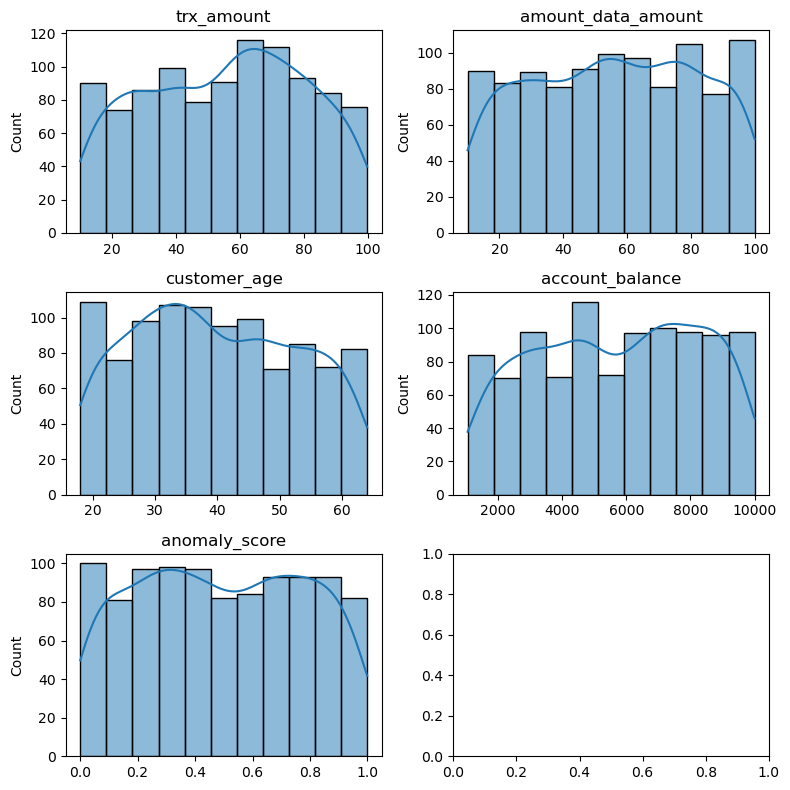

In [27]:
# Obtener las columnas numéricas del dataframe
numeric_columns = df_joined.select_dtypes(include=['int64', 'float64']).columns

# Excluir las columnas de identificación, flags y fraud_indicator
excluded_columns = ['trx_id', 'merchant_id', 'customer_id', 'fraud_indicator','suspicious_flag']
numeric_columns = [col for col in numeric_columns if col not in excluded_columns]

# Calcular el número de filas y columnas para la grilla de histogramas
num_cols = 2
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2


# Crear la figura y los ejes de la grilla
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

# Iterar por cada columna numérica y crear un histograma en el eje correspondiente
for current_idx, col in enumerate(numeric_columns):
    i = current_idx // num_cols
    j = current_idx % num_cols
    sns.histplot(df_joined[col], ax=axes[i][j],kde=True)
    axes[i][j].set_title(col)
    axes[i][j].set_xlabel("")

# Ajustar los espacios entre los subplots
plt.tight_layout()

### Identifico variables

In [61]:
# variables categoricas
v_cat = ['trx_category','fraud_indicator','suspicious_flag']
# variables cuantitativas
v_num = ['trx_amount','amount_data_amount','customer_age','account_balance','anomaly_score']

### Boxplot

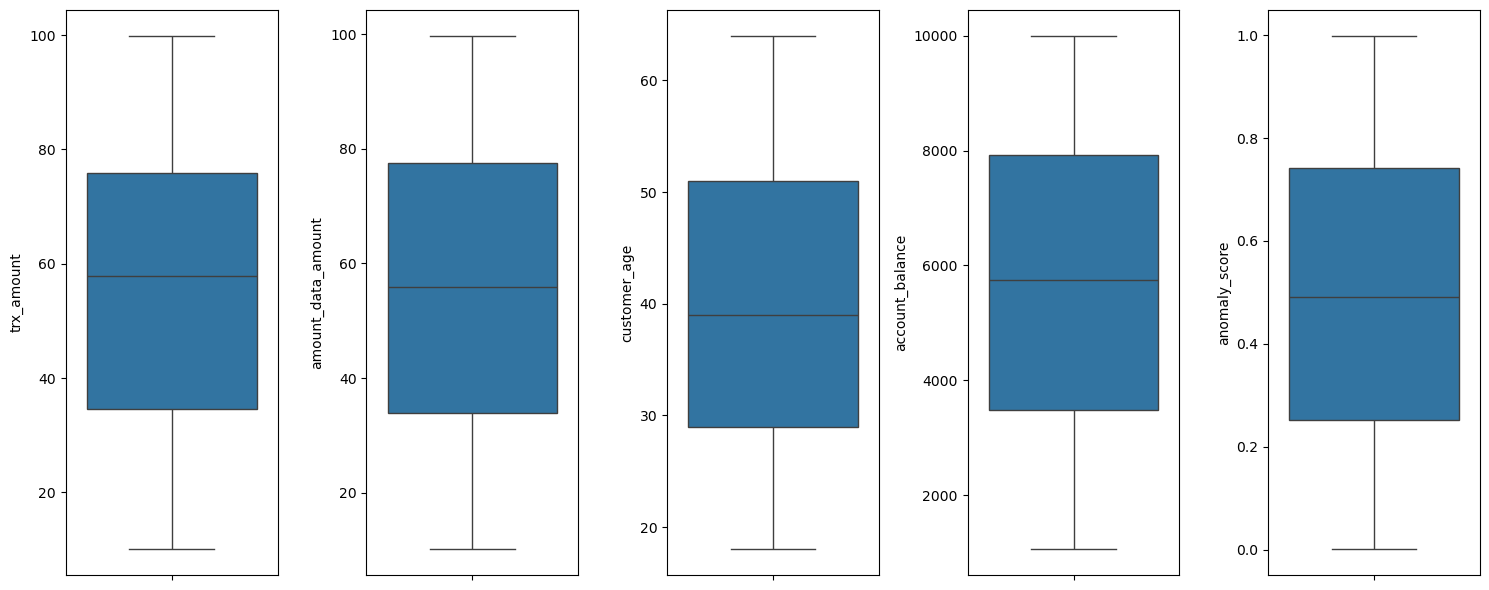

In [63]:
# numericos
variables = v_num

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_joined, ax=ax)
plt.tight_layout()

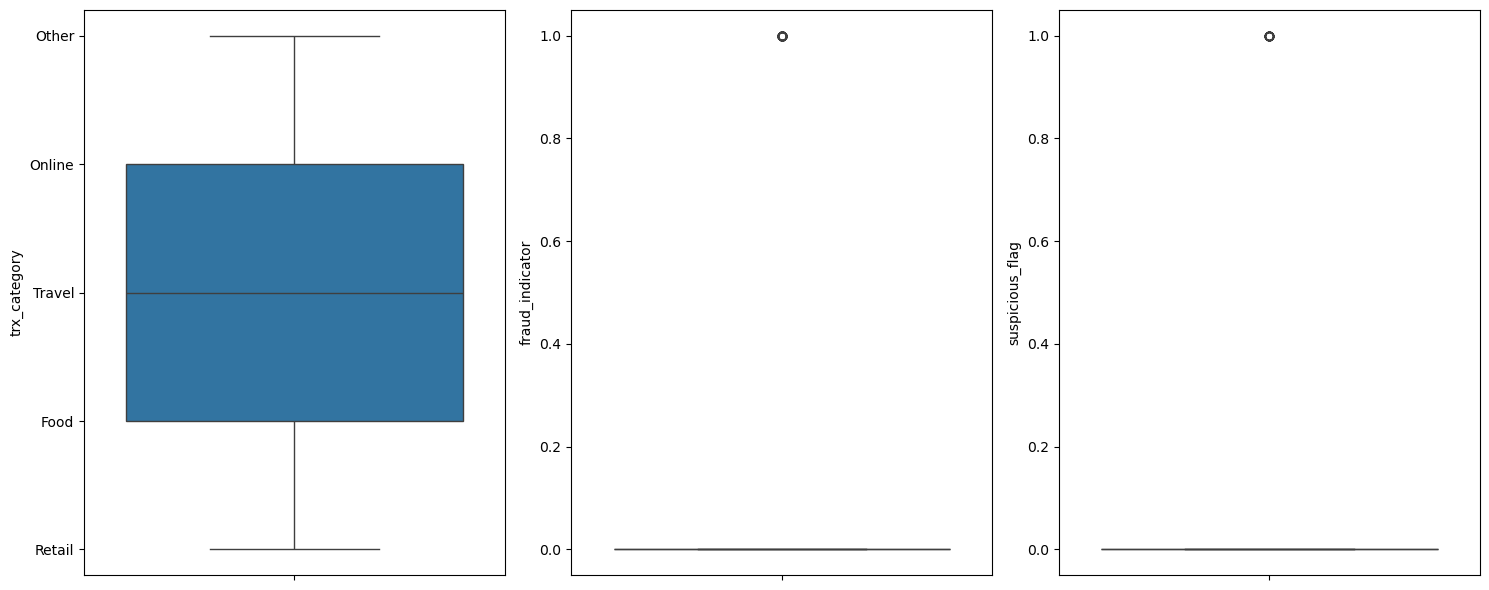

In [64]:
# categoricas
variables = v_cat

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_joined, ax=ax)
plt.tight_layout()

<Axes: xlabel='fraud_indicator', ylabel='Count'>

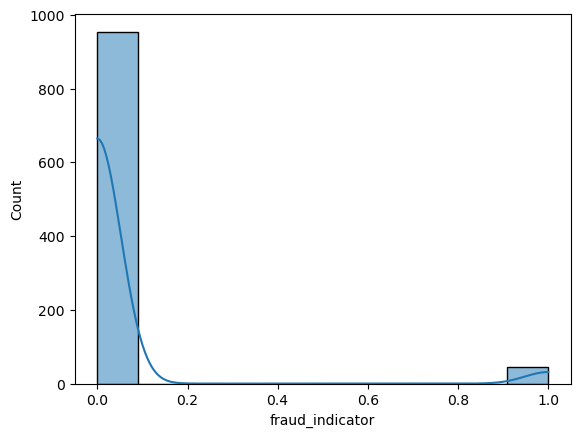

In [81]:
# 
feature = 'fraud_indicator'

sns.histplot(df_joined, x=feature, kde=True)

Vemos que el dataset es muy desbalanceado respecto a los indicadores "fraud indicator" y "suspicious flag" 

### Correlacion

In [91]:
correlation = df_joined.filter(v_num).corr()

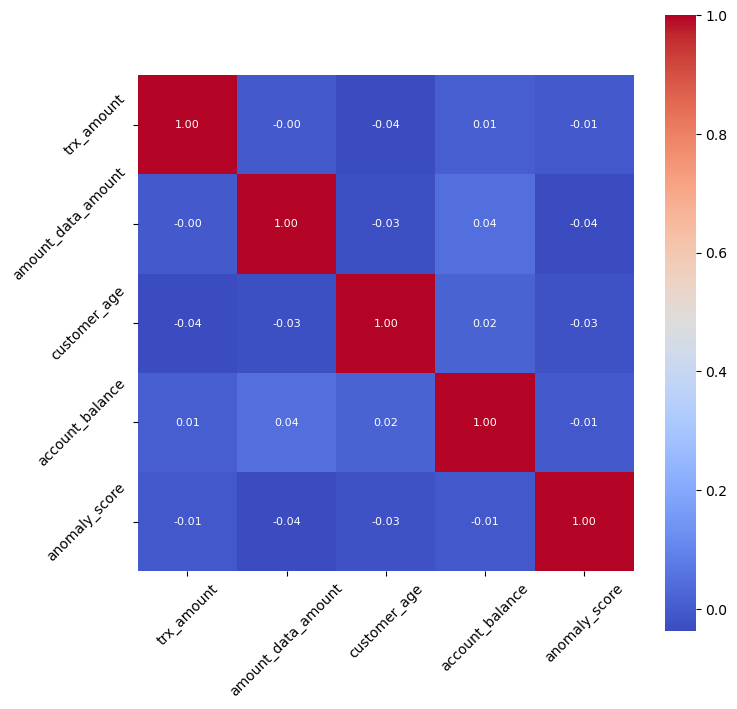

In [92]:
# Heatmap de correlación de las variables numéricas
plt.figure(figsize=(8,8)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 8},
            cmap= 'coolwarm') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## Preguntas

> Podemos preguntarnos para empezar:
> 1. ¿Cuál es la proporción de transacciones fraudulentas frente a las transacciones no fraudulentas en el conjunto de datos?
> 2. ¿Existen variables que sean significativamente diferentes entre las transacciones fraudulentas y no fraudulentas?
> 3. ¿Cómo se distribuyen las transacciones fraudulentas a lo largo del tiempo? ¿Hay algún patrón temporal?
> 4. ¿Cuál es la cantidad de dinero promedio involucrada en una transacción fraudulenta en comparación con una transacción no fraudulenta?
> 5. ¿Existen correlaciones entre las variables del conjunto de datos que podrían ser útiles para la detección de fraudes?

### 1. ¿Cuál es la proporción de transacciones fraudulentas frente a las transacciones no fraudulentas en el conjunto de datos?


In [28]:
fraud_proportion = df_joined['fraud_indicator'].value_counts(normalize=True) * 100
fraud_proportion

fraud_indicator
0    95.5
1     4.5
Name: proportion, dtype: float64

### 2. ¿Existen variables que sean significativamente diferentes entre las transacciones fraudulentas y no fraudulentas?

In [38]:
df_joined.head()

,trx_id,trx_timestamp,merchant_id,trx_amount,customer_id,amount_data_amount,trx_category,merchant_name,merchant_location,customer_name,customer_age,customer_address,account_balance,account_last_login,anomaly_score,fraud_indicator,suspicious_flag
0,1,2022-01-01 00:00:00,2701,55.530334,1952,79.413607,Other,Merchant 2701,Location 2701,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0.686699,0,0
1,2,2022-01-01 01:00:00,2070,12.881180,1027,12.053087,Online,Merchant 2070,Location 2070,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0.081749,0,0
2,3,2022-01-01 02:00:00,2238,50.176322,1955,33.310357,Travel,Merchant 2238,Location 2238,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0.023857,0,0
3,4,2022-01-01 03:00:00,2879,41.634001,1796,46.121117,Travel,Merchant 2879,Location 2879,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0.876994,0,0
4,5,2022-01-01 04:00:00,2966,78.122853,1946,54.051618,Other,Merchant 2966,Location 2966,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0.034059,0,0


In [94]:
# df_joined head to csv file pandas
df_joined.to_csv('./work/data/df_joined.csv', index=False)